In [1]:
import pandas as pd
import numpy as np
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords   
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')
nltk.download("stopwords")
import seaborn as sns
from sklearn import datasets
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
nltk.download("stopwords")
from nltk.tokenize import word_tokenize  
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
import pandas as pd
df_s = pd.read_csv("Flipkart_Reviews - Electronics.csv")
df1 = pd.read_csv("Product Review Data.csv")


In [4]:
l1 = df_s['product_title']
lw = []
for i in l1:
   last_word = i.split()[-2] 
   lw.append(last_word)
lw
df_s['category'] = lw
from sklearn.utils import shuffle
df = shuffle(df_s)
df = df.sample(frac = 0.5)

In [5]:
l2 = df1['name']
lw2 = []
for i in l2:

  lastword = i.split()[-1]
  lw2.append(lastword)
lw2

df1['category'] = lw2

In [6]:
df1['category'].unique()

array(['Paperwhite', 'Keyboard', '1st)', 'Fabric', 'Tangerine', '8.9"',
       'Leather', 'Blue', 'Controller', 'Tablet', 'White', 'Magenta',
       'E-reader', 'Green', 'Black', '3G', 'Alexa', 'Walnut', 'Offers',
       'TV', 'eReaders', 'Generation', 'Kindle', '7"', 'Speaker', 'Phone',
       'Dot', 'Headphones', 'Stick'], dtype=object)

In [7]:
df1 = df1.replace(to_replace=["Keyboard"],
           value="Accessories")
df1 = df1.replace("Paperwhite","eReaders")
df1 = df1.replace(to_replace=["Tablet"],
           value="eReaders")
df1 = df1.replace(to_replace=["Fabric"],
           value="Accessories")
df1 = df1.replace(to_replace=["Walnut"],
           value="Accessories")
df1 = df1.replace(to_replace=["Tangerine"],
           value="Accessories")
df1 = df1.replace(to_replace=['White'],
           value='Accessories')
df1 = df1.replace(to_replace=['Magenta'],
           value='Accessories')
df1 = df1.replace(to_replace=['Black'],
           value='Accessories')
df1 = df1.replace(to_replace=['Green'],
           value='Accessories')
df1 = df1.replace(to_replace=['Blue'],
           value='Accessories')
df1 = df1.replace(to_replace=['Leather'],
           value='Accessories')
df1 = df1.replace(to_replace=['Controller'],
           value='Game Controller')
df1 = df1.replace(to_replace=['E-reader'],
           value='eReaders')
df1 = df1.replace(to_replace=['8.9"'],
           value='eReaders')
df1 = df1.replace(to_replace=['7"'],
           value='eReaders')
df1 = df1.replace(to_replace=['1st'],
           value='TV')
df1 = df1.replace(to_replace=['3G'],
           value='eReaders')
df1 = df1.replace(to_replace=['Alexa'],
           value='eReaders')
df1 = df1.replace(to_replace=['Phone'],
           value='Accessories')

df1 = df1.replace(to_replace=['Stick'],
           value='Accessories')

df1 = df1.replace(to_replace=['1st)'],
           value='TV')

df1 = df1.replace(to_replace=['Dot'],
           value='Accessories')

df1 = df1.replace(to_replace=['Offers'],
           value='eReaders')
df1 = df1.replace(to_replace=['Generation'],
           value='Accessories')
df1 = df1.replace(to_replace=['Kindle'],
           value='eReaders')
df1 = df1.replace(to_replace=['Game Controller'],
           value='Accessories')
df = df.replace(to_replace=['Bluetooth'],
           value='Headphones')
df = df.replace(to_replace=['Wired'],
           value='Headphones')

In [8]:
df_final = df[['category','summary','review','date']].copy()
df_final.head(5)


,category,summary,review,date
112,Headphones,Really Nice,Review after 20 days of use.First of all bass ...,8 months ago
7128,Headphones,Really Nice,Not Bad,5 days ago
5044,Headphones,Decent product,After use of 5 months my review is this produc...,1 day ago
8151,Headphones,Could be way better,It's not as good as shown and not properly fi...,4 days ago
8399,Headphones,Simply awesome,Really nice..,8 days ago


In [9]:
#creating headers for the first dataset
df_final = df[['category','summary','review','date']].copy()
df_final.head(5)
#creating headers for the second dataset
df2 = pd.DataFrame(df1)
df2.rename(columns = {'reviews.text':'review', 'reviews.title':'summary',
                              'dateAdded':'date'}, inplace = True)
df2_final = df2[['category','summary','review','date']].copy()
#Merging the two datasets that wll be used for modelling
df3_s = pd.concat([df_final,df2_final], ignore_index=True)


In [10]:
#Shuffling the dataset
from sklearn.utils import shuffle
df3 = shuffle(df3_s)
df3.head(5)

,category,summary,review,date
3142,Headphones,Super!,💛All in One🎧😍👍👍👍,"Nov, 2019"
889,Headphones,Does the job,While playing game sound come after some sec i...,7 months ago
3210,Headphones,Must buy!,Good one. I Bought this and MI Basics together...,"May, 2019"
6073,Speaker,Good alt to echo,This is a good alternative to the amazon echo....,2017-01-04T03:51:17Z
3652,Headphones,Terrific purchase,"Nice one, this is best one in best price",16 days ago


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


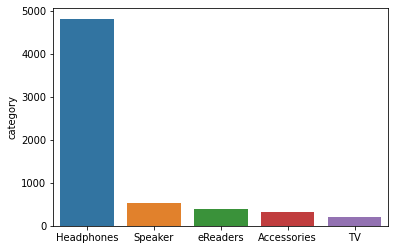

In [11]:
#product categories in dataset
vc=df3['category'].value_counts()
sns.barplot(vc.index,vc)

In [12]:
replace_with_space = re.compile('[/(){}\[\]\|@,;]')
remove_symbols = re.compile('[^a-z]')
stop_words = set(stopwords.words('english'))

In [13]:
def clean_text(sent):
    word_tokens = word_tokenize(sent)
    # lowercase text
    sent = sent.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    sent = replace_with_space.sub(' ', sent) 
    # delete symbols which are in BAD_SYMBOLS_RE from text
    sent = remove_symbols.sub(' ', sent) 
    return sent

In [14]:
df3['date_review'] = df3['review'] + df3['date']

In [15]:
#creating a new feature which combines date with review
df3['date_review'] = df3['review'] + df3['date']
df3['review_summary_clean'] = df3['date_review'].apply(clean_text)
df3['review_summary_clean']

3142                             all in one     nov      
889     while playing game sound come after some sec i...
3210    good one  i bought this and mi basics together...
6073    this is a good alternative to the amazon echo ...
3652    nice one  this is best one in best price   day...
                              ...                        
2077    good product at this price point   bass  sound...
4708    i already had an original kindle paperwhite an...
3082    product is  must purchase type   however i exp...
5829    i own the echo  and love the product  so i pur...
2831    can t explain in word outstanding and thank to...
Name: review_summary_clean, Length: 6284, dtype: object

In [16]:

X = df3.review_summary_clean
y =  df3.category
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 42)

In [17]:
pred_list = []
labels = df3.category.unique().tolist()
import logging
import time
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
start = time.time()
nb.fit(X_train, y_train)
stop = time.time()

nbc_time = start-stop
#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
pred_list.append(y_pred)
print('accuracy %s' % accuracy_score(y_pred, y_test))
acc = (accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))
precision_nbc = precision_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
recall_nbc = recall_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
accuracy_nbc = accuracy_score(y_test, y_pred)
accuracyl = []
precisionl = []
recalll = []

accuracyl.append(accuracy_nbc)
precisionl.append(precision_nbc)
recalll.append(recall_nbc)


accuracy 0.8260869565217391
              precision    recall  f1-score   support

  Headphones       1.00      0.05      0.09       104
     Speaker       0.82      1.00      0.90      1416
          TV       0.97      0.17      0.28       181
    eReaders       1.00      0.39      0.56        70
 Accessories       0.79      0.70      0.74       115

    accuracy                           0.83      1886
   macro avg       0.92      0.46      0.51      1886
weighted avg       0.85      0.83      0.78      1886



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [209]:
actvspred = pd.DataFrame()
actvspred['TestReviews'] = X_test
actvspred['actual'] = y_test
actvspred['predicted'] = y_pred
print(actvspred)

                                            TestReviews       actual  \
2430  worst product don t go for it worst battery ba...   Headphones   
1873  sound for listening music is sufficient and ba...   Headphones   
1930  sound quality super battery backup super quali...   Headphones   
5299  if you read my fire tv review you know that i ...     eReaders   
6084  i like moshi s anti glare screen protectors so...  Accessories   
...                                                 ...          ...   
4237  sounds is very low after some days i buy   pai...   Headphones   
669            battery back up only   hours  months ago   Headphones   
4445  under    rs this was best deal earphone  gives...   Headphones   
3223  very bad product i had got pain in my ear afte...   Headphones   
4250  ten days work properly  then while calling vol...   Headphones   

       predicted  
2430  Headphones  
1873  Headphones  
1930  Headphones  
5299    eReaders  
6084  Headphones  
...          ...  
42

In [18]:

from sklearn.linear_model import SGDClassifier


sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', 
                                      penalty='l2',alpha=1e-3, 
                                      random_state=42, max_iter=100, tol=None)),
               ])
import time
start = 0
stop = 0
start = time.time()
sgd.fit(X_train, y_train)
stop = time.time()

sgd_time = start - stop
#%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=labels))

precision_sgd = precision_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
recall_sgd = recall_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
accuracy_sgd = accuracy_score(y_test, y_pred)

accuracyl.append(accuracy_sgd)
precisionl.append(precision_sgd)
recalll.append(recall_sgd)

accuracy 0.9353128313891834


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [19]:
from sklearn import svm, datasets


svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(kernel='rbf',degree = 5,coef0=0,shrinking=True,random_state=None)),
               ])
start = 0
stop = 0
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
svm_time = start-stop
#%%time

y_pred = svm.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=labels))
precision_svm = precision_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
recall_svm = recall_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
accuracy_svm = accuracy_score(y_test, y_pred)

accuracyl.append(accuracy_svm)
precisionl.append(precision_svm)
recalll.append(recall_svm)

accuracy 0.9554612937433722


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=5,metric='minkowski',n_jobs=None)),
               ])
start = 0
stop = 0
start = time.time()
knn.fit(X_train, y_train)
stop = time.time()

knn_time = start - stop
#%%time

y_pred = knn.predict(X_test)



print('accuracy %s' % accuracy_score(y_pred, y_test))

precision_knn = precision_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
recall_knn = recall_score(y_test, y_pred,pos_label='positive',
                                           average='macro')
accuracy_knn = accuracy_score(y_test, y_pred)

accuracyl.append(accuracy_knn)
precisionl.append(precision_knn)
recalll.append(recall_knn)

accuracy 0.9241781548250265


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


ul is ['Headphones' 'Speaker' 'TV' 'eReaders' 'Accessories']
Precision:  0.9241781548250265
Recall:  0.9241781548250265
Accuracy:  0.9241781548250265


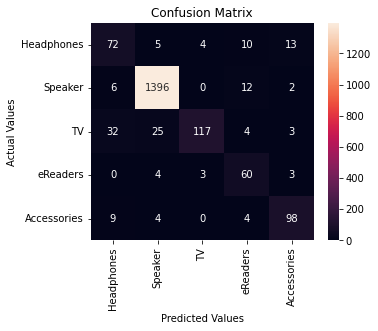

In [21]:
#accuracy
#Importing the required libraries
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
precision = precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro')
recall = recall_score(y_test, y_pred,pos_label='positive',
                                           average='micro')
accuracy = accuracy_score(y_test, y_pred)

ul = df3['category'].unique()
print("ul is",ul)
print('Precision: ',precision)
print('Recall: ',recall)
print('Accuracy: ',accuracy)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ul,
                     columns = ul)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [22]:
model_names = ['MultinomialNB','SGD','SVM-RBF','KNN']

accuracyl = [accuracy_nbc,accuracy_knn,accuracy_sgd,accuracy_svm]
precisionl = [precision_nbc,precision_knn,precision_sgd,precision_svm]
recalll = [recall_nbc,recall_knn,recall_sgd,recall_svm]

model_names = ['MultinomialNB','KNN','SGD','SVM-RBF']
measures_list = [accuracyl,precisionl,recalll]


metrics = pd.DataFrame(measures_list,index =['Accuracy','Precision','Recall'],
                       columns = ['MultinomialNB','KNN','SGD','SVM-RBF']
                       
                    )
metrics


,MultinomialNB,KNN,SGD,SVM-RBF
Accuracy,0.826087,0.924178,0.935313,0.955461
Precision,0.916424,0.802457,0.917402,0.947950
Recall,0.459038,0.806782,0.787893,0.848449


In [24]:
time_list = [nbc_time*-1,knn_time*-1,sgd_time*-1,svm_time*-1]
time_to_run = pd.DataFrame(time_list,index = ['MultinomialNB','KNN','SGD','SVM-RBF'],
                       columns = ['Time'])
time_to_run

,Time
MultinomialNB,0.267946
KNN,0.203506
SGD,0.501020
SVM-RBF,4.246822


In [25]:

model_names = ['MultinomialNB','KNN','SGD','SVM-RBF']


measures_list = [accuracyl,precisionl,recalll,time_list]

metrics = pd.DataFrame(measures_list,index =['Accuracy','Precision','Recall','Time'],
                       columns = ['MultinomialNB','KNN','SGD','SVM-RBF']
                       
                    )
metrics

,MultinomialNB,KNN,SGD,SVM-RBF
Accuracy,0.826087,0.924178,0.935313,0.955461
Precision,0.916424,0.802457,0.917402,0.947950
Recall,0.459038,0.806782,0.787893,0.848449
Time,0.267946,0.203506,0.501020,4.246822


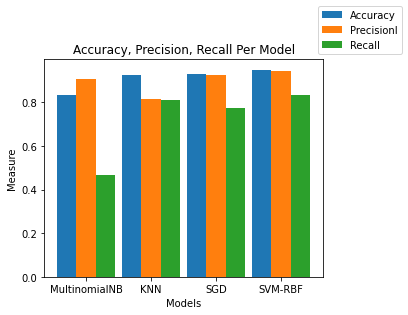

In [ ]:
#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
import matplotlib.pyplot as plt
%matplotlib inline
r = np.arange(len(model_names))
width = 0.25
plt.figure(figsize=(5,4))

plt.bar(r-0.30, accuracyl,0.3, label = 'Accuracy')
plt.bar(r+0.00, precisionl,0.3, label = 'Precisionl')
plt.bar(r+0.30, recalll,0.3, label = 'Recall')

plt.xticks(r,model_names)
plt.xlabel("Models")
plt.ylabel("Measure")
plt.title("Accuracy, Precision, Recall Per Model")
plt.legend(bbox_to_anchor=(1.3, 1.0), loc='lower right')
#plt.legend(fontsize = 6)
plt.show()


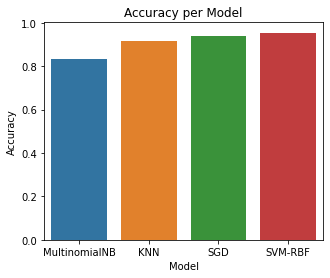

In [218]:
plt.figure(figsize=(5,4))
sns.barplot(x=model_names,y = accuracyl)
plt.title('Accuracy per Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

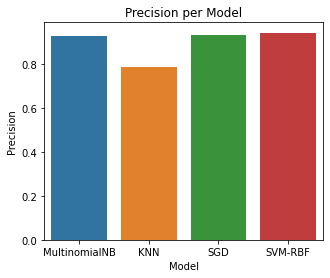

In [219]:
plt.figure(figsize=(5,4))
sns.barplot(x=model_names,y = precisionl)
plt.title('Precision per Model')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.show()

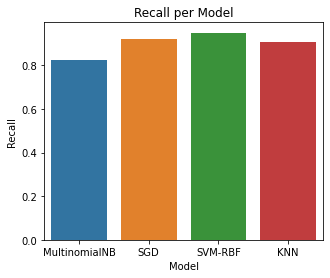

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x=model_names,y = recalll)
plt.title('Recall per Model')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()